In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import feature_extraction

In [15]:
def distance_ecu(x_train, x_test_point):
    distances = np.linalg.norm(x_train - x_test_point, axis=-1, ord=1)
    return distances


def nearest_neighbors(distance_point, K):
    rank = np.argsort(distance_point)
    df_nearest = rank[:K]
    distances = distance_point[df_nearest]
    return df_nearest, distances
     

def voting(df_nearest, weights, y_train, num_of_classes=3):
    bench = np.ones(num_of_classes) 
    labels = y_train[df_nearest]
    # for weight, label in zip(weights, labels):
    #     label = int(label)
    #     bench[label] -= weight
    # bench[bench==0] = -np.inf
    index, counts = np.unique(labels, return_counts=True)
    y_pred = index[np.argmax(counts)]
    # return np.argmax(bench)
    return y_pred

def KNN_from_scratch(x_train, y_train, x_test, K):
    y_pred = []
    for sample in x_test:
        distances = distance_ecu(x_train, sample)
        df_nearest, weights = nearest_neighbors(distances, K)
        pred = voting(df_nearest, weights, y_train)
        y_pred.append(pred)
    return y_pred  

def print_result(result, y_test):
    true_positive = y_test == result
    return np.count_nonzero(true_positive) / len(true_positive)


In [5]:

class ImageClassifier:
    def __init__(self, train_path, test_path):
        self.train_path = train_path
        self.test_path = test_path
        self.train_set = os.listdir(train_path)
        self.test_set = os.listdir(test_path)
        self.fit()

    def fit(self):
        self.train_data = None 
        self.test_data = None 
        # for animals in self.train_set:
        # for simplicity i just used two classes
        for animals in self.train_set:
            if animals.endswith('Store'):
                continue
            print(f'Now animal {animals}')
            tmp_path = os.path.join(self.train_path, animals)
            datafiles = os.listdir(tmp_path)
            print('Training sets...')
            for singlefile in tqdm(datafiles):
                img = feature_extraction.load_animals(os.path.join(tmp_path, singlefile))
                hiera = feature_extraction.gaussian_pyramide(img)
                feature_vector = feature_extraction.feature_extraction(hiera)
                if self.train_data is None:
                    self.train_data = feature_vector.copy()
                else:
                    self.train_data = np.vstack((self.train_data, feature_vector))
            
            # dont judge me, im just lazy
            print('Test sets...')
            tmp_path = os.path.join(self.test_path, animals)
            datafiles = os.listdir(tmp_path)
            for singlefile in tqdm(datafiles):
                img = feature_extraction.load_animals(os.path.join(tmp_path, singlefile))
                hiera = feature_extraction.gaussian_pyramide(img)
                feature_vector = feature_extraction.feature_extraction(hiera)
                if self.test_data is None:
                    self.test_data = feature_vector.copy()
                else:
                    self.test_data = np.vstack((self.test_data, feature_vector))
        # self.train_x = pd.DataFrame(self.train_data)
        # self.test_x = pd.DataFrame(self.test_data)
        # # thoes are hard coded, because im lazy
        # self.train_y = pd.DataFrame(np.hstack((np.zeros(600), np.ones(600))))
        # self.test_y = pd.DataFrame(np.hstack((np.zeros(200), np.ones(200))))
        self.train_x = self.train_data
        self.test_x = self.test_data
        # thoes are hard coded, because im lazy
        self.train_y = np.hstack((np.zeros(600), np.ones(600), np.ones(600) * 2))
        self.test_y = np.hstack((np.zeros(200), np.ones(200), np.ones(200) * 2))
            

In [6]:

ic = ImageClassifier(train_path='./LinnaeusDS/train/',
                        test_path='./LinnaeusDS/test/')

Now animal dog
Training sets...


100%|██████████| 600/600 [00:05<00:00, 105.53it/s]


Test sets...


100%|██████████| 200/200 [00:01<00:00, 106.01it/s]


Now animal flower
Training sets...


100%|██████████| 600/600 [00:05<00:00, 103.88it/s]


Test sets...


100%|██████████| 200/200 [00:01<00:00, 104.33it/s]


Now animal bird
Training sets...


100%|██████████| 600/600 [00:06<00:00, 88.99it/s] 


Test sets...


100%|██████████| 200/200 [00:02<00:00, 78.10it/s]


In [16]:
result = KNN_from_scratch(ic.train_x, ic.train_y, ic.test_x, 29)
print('Highst Acu: ' , print_result(result, ic.test_y), '%')

Highst Acu:  0.47833333333333333 %


In [17]:
for k in range(15, 40, 2):
    result = KNN_from_scratch(ic.train_x, ic.train_y, ic.test_x, k)
    print(k, end=' ')
    print(print_result(result, ic.test_y))

15 0.46
17 0.44666666666666666
19 0.4633333333333333
21 0.4583333333333333
23 0.4533333333333333
25 0.4683333333333333
27 0.46166666666666667
29 0.47833333333333333
31 0.47333333333333333
33 0.45166666666666666
35 0.445
37 0.44666666666666666
39 0.43666666666666665


In [28]:
pca = PCA(n_components=3)
pca.fit(ic.train_data)
X = pca.transform(ic.train_data)

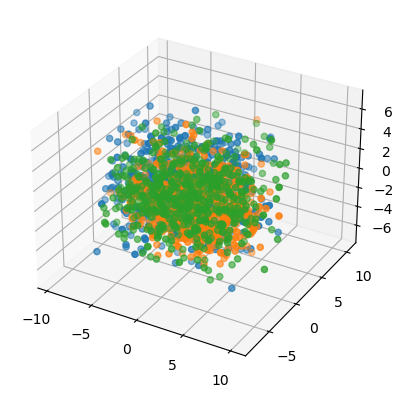

In [29]:
x = X[:, 0].T
y = X[:, 1].T
z = X[:, 2].T
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x[:600], y[:600], z[:600])
ax.scatter(x[600:1200], y[600:1200], z[600:1200])
ax.scatter(x[1200:], y[1200:], z[1200:])
plt.show()

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(ic.train_x, ic.train_y)